In [1]:
### Ames Housing Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/AmesHousing.csv')

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# to check for missing value
100*(df.isnull().sum()/len(df))

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64

In [6]:
# there are a number of missing values in certain variables
# 'Lot Frontage','Alley','Mas Vnr Type','Mas Vnr Area','Bsmt Qual','Bsmt Cond',' Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1'
# 'BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Electrical','Bsmt Full Bath','Bsmt Half Bath',
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [8]:
# there are no duplicated values
duplicates

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [9]:
# variables with numeric values
df.select_dtypes(['int','float'])

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [10]:
# to observe correlation of all numeric features
df.select_dtypes(['int','float']).corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


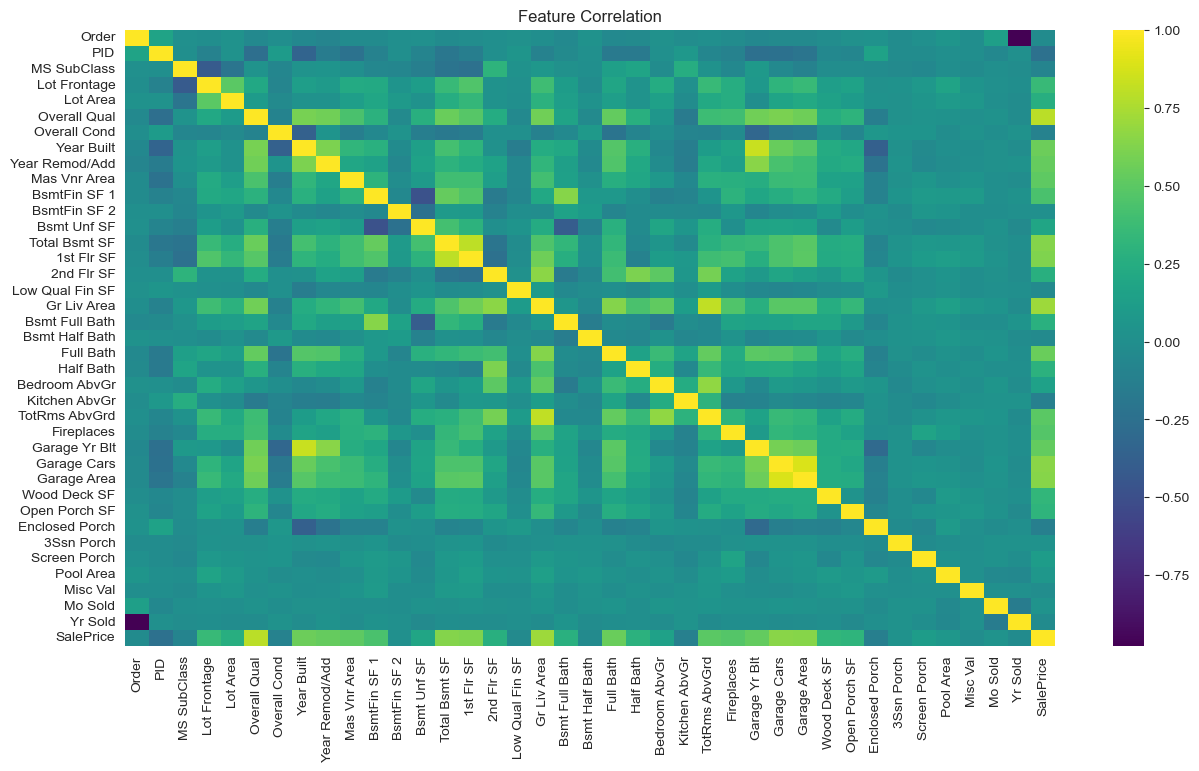

In [13]:
# to visualise correlation values in a heatmap
plt.figure(figsize=(15,8), dpi=100)
sns.heatmap(df.select_dtypes(['int','float']).corr(), cmap='viridis')
plt.title('Feature Correlation')
plt.show()

In [14]:
# target variable 'SalePrice'
# 'Overall Qual','Gr Liv Area','Garage Cars' are highly correlated with the Sale price
df.select_dtypes(['int','float']).corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

In [15]:
# to print categorical variables in dataset
df.select_dtypes('object').head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


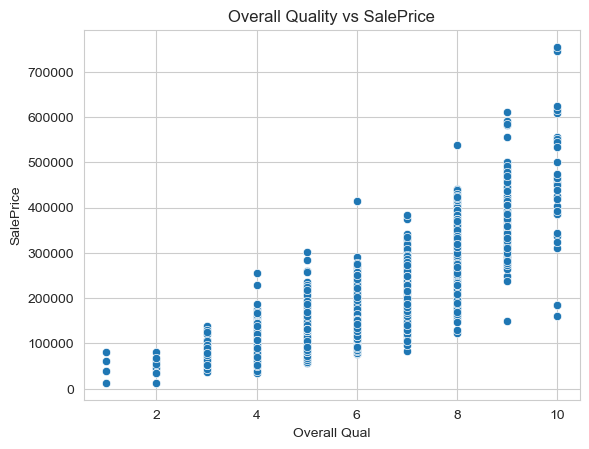

In [16]:
# As the quality goes up, so does the price of the house
sns.scatterplot(data=df, x='Overall Qual',y='SalePrice')
plt.title('Overall Quality vs SalePrice');

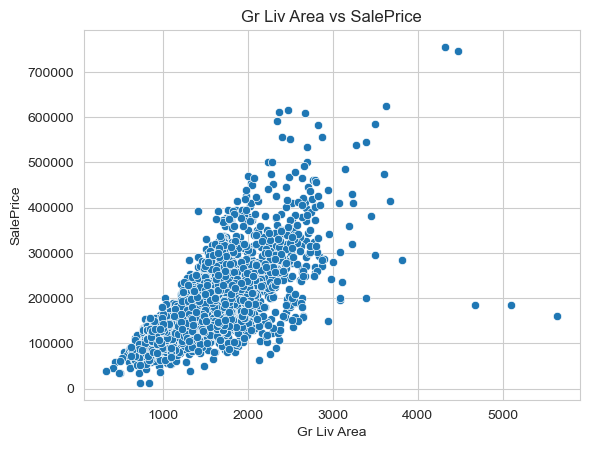

In [18]:
sns.scatterplot(data=df, x='Gr Liv Area',y='SalePrice')
plt.title('Gr Liv Area vs SalePrice');

In [19]:
# to point out the outliers of 'overall quality' according to sale price, subsetting the data
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 100000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [41]:
# to print the row numbers where outliers points are
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

Index([1498, 2180, 2181], dtype='int64')

In [42]:
# to remove outliers in 'Gr Liv Area' where the houses are ridiculously expensive, according to the above scatterplot,drop function
drop_ind = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [43]:
# specify axis=0 means to remove values along the column, to remove 3 outlier points from Gr Liv Area
df = df.drop(drop_ind, axis=0)

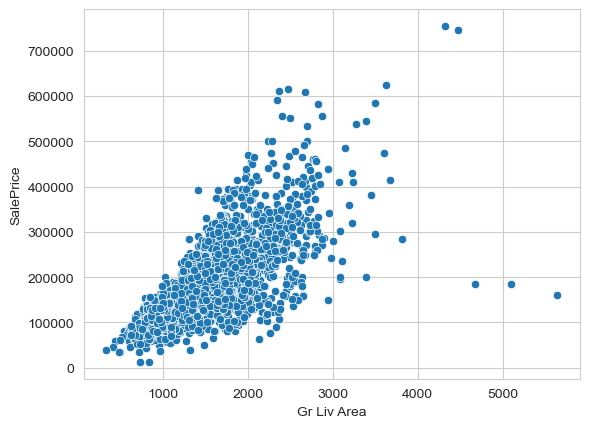

In [20]:
# to replot the same scatterplot to see if outlier points have been removed, 3 outlier points have been removed
sns.scatterplot(data=df, x='Gr Liv Area',y='SalePrice');

In [21]:
# 3 outliers houses have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [22]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [23]:
# to remove 'PID' as not useful for our analysis
df = df.drop(['PID','Order'],axis=1)

In [24]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [28]:
100*(df.isnull().sum()/len(df))

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [29]:
# to create a custom function that reports back the % of missing values in each column
def percent_missing(df):
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False) # print % more than 0 & sort % missing vlaues Ascending
    
    return percent_nan

In [30]:
# to apply function
percent_nan = percent_missing(df)

In [31]:
# to see the total % of missing values in each features
# around 99%, almost all of the houses may not have a pool feature or that the information is not collected
percent_nan

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
BsmtFin SF 1       0.034130
Garage Cars        0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
dtype: float64

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\3057296290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="husl")


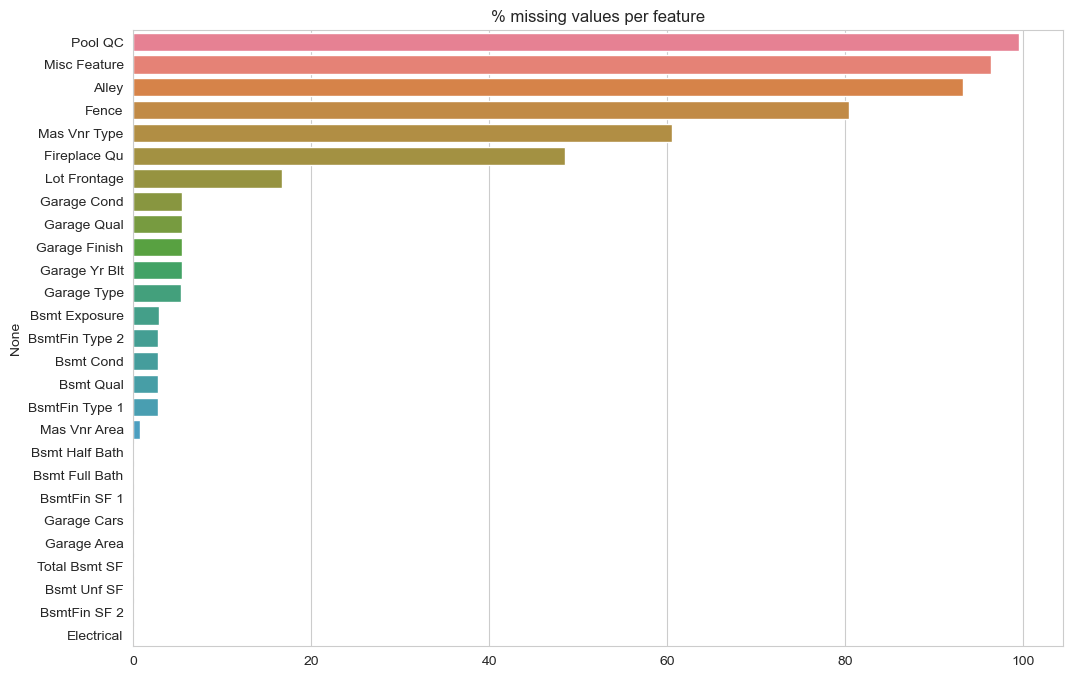

In [33]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="husl")
plt.title('% missing values per feature');

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\1001636397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="Paired")


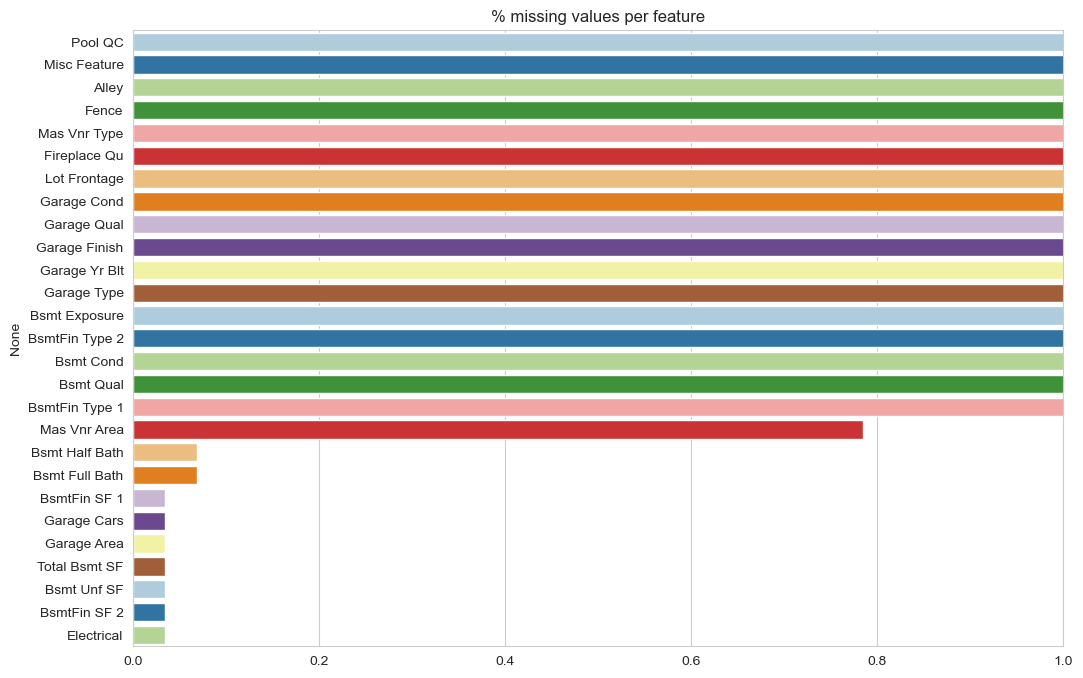

In [34]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="Paired")
plt.title('% missing values per feature')
plt.xlim(0,1); # to set the y limits from 0 to 1 (from 0 to 1%) Zoom in to variables with 1% missing variables

In [35]:
# to check the percentage of missing values per variable where it is less than 1%
percent_nan[percent_nan < 1].sort_values(ascending=False)

Mas Vnr Area      0.784983
Bsmt Half Bath    0.068259
Bsmt Full Bath    0.068259
BsmtFin SF 1      0.034130
Garage Cars       0.034130
Garage Area       0.034130
Total Bsmt SF     0.034130
Bsmt Unf SF       0.034130
BsmtFin SF 2      0.034130
Electrical        0.034130
dtype: float64

In [36]:
# this answer tells us that there is one row of missing values in 'Electrical','Garage Cars','BsmtFin SF 1','Garage Area'
# 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF'
100/len(df)

0.034129692832764506

In [40]:
# to print to location of missing 1 row. Row 1577 is missing the whole row
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [42]:
# to check if the missing one row for 'Electrical' is the same as for 'Garage Area'
# 'Garage Area' missing row is different from 'Electrical', 2 missing rows in < 1%
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [61]:
# to check the location of missing values of 'Bsmt Half Bath'
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [43]:
# to remove missing values along rows, axis=0, % missing values is very small
df = df.dropna(axis=0, subset =['Electrical','Garage Cars'])

In [44]:
# to recalculate the percent of missing values
percent_nan = percent_missing(df)

In [45]:
# to check where percent nan is missing less than 1% values
percent_nan[percent_nan <1]

Mas Vnr Area      0.785519
Bsmt Half Bath    0.068306
Bsmt Full Bath    0.068306
BsmtFin SF 1      0.034153
Bsmt Unf SF       0.034153
BsmtFin SF 2      0.034153
Total Bsmt SF     0.034153
dtype: float64

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\4166461926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="Spectral")


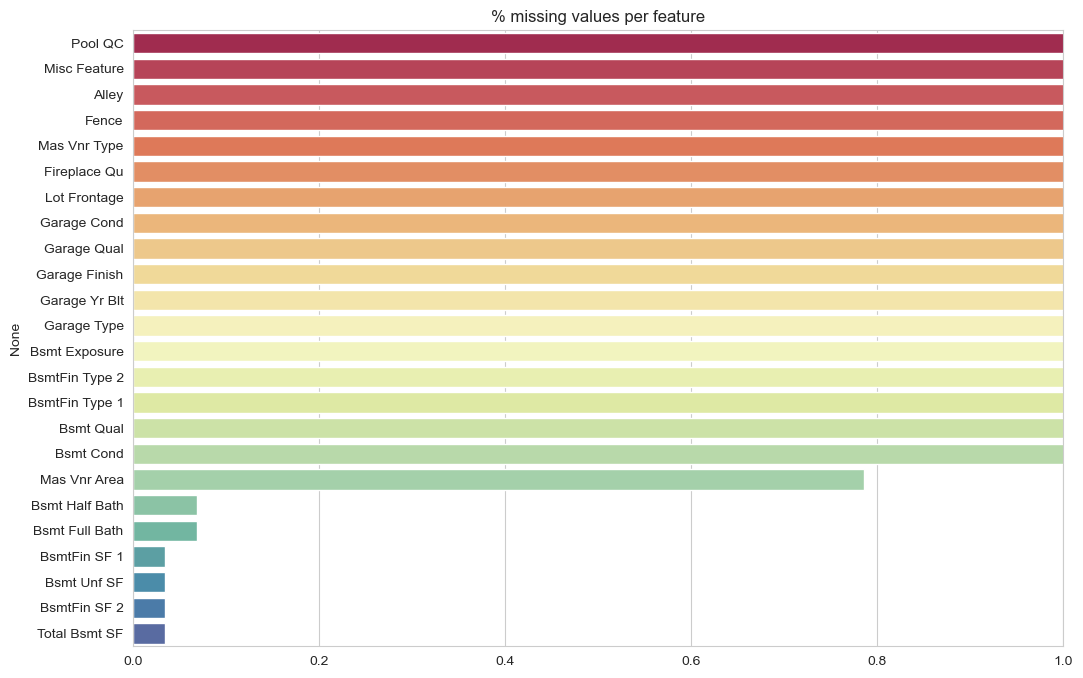

In [48]:
# to visualise the missing values, less than 1% missing values again, after removing 2 rows of missing values
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="Spectral")
plt.title('% missing values per feature')
plt.xlim(0,1); # to print less than 1% missing values

In [49]:
# to see the basement missing features 'Bsmt' variables
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [50]:
# seems that variables 'Bsmt Half Bath' & 'Bsmt Full Bath' have missing variables in the same location
df[df['Bsmt Half Bath'].isnull()]['Bsmt Full Bath']

1341   NaN
1497   NaN
Name: Bsmt Full Bath, dtype: float64

In [51]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [52]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [53]:
df[df['BsmtFin SF 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [54]:
df[df['BsmtFin SF 2'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [56]:
# to read basment numeric variables into a new dataframe
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

In [57]:
# BSMT numeric columns, to replace missing values with 0
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [58]:
# 'Bsmt Qual' has 2.73% missing values, categorical variable
df[df['Bsmt Qual'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
83,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
154,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
206,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
243,20,RL,60.0,11100,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml,84900
273,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,135000
2744,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,93000
2879,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,51689
2892,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,230000


In [59]:
# 'Bsmt Cond' has 2.73% missing values, categorical variable
df[df['Bsmt Cond'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
83,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
154,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
206,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
243,20,RL,60.0,11100,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml,84900
273,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,135000
2744,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,93000
2879,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,51689
2892,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,230000


In [60]:
# 'Bsmt Exposure' has 2.83% missing values, categorical variable
df[df['Bsmt Exposure'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
66,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,221500
83,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
154,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
206,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
243,20,RL,60.0,11100,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,93000
2779,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500
2879,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,51689
2892,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,230000


In [61]:
# 'BsmtFin Type 1' has 2.73% missing values
df[df['BsmtFin Type 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
83,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
154,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
206,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
243,20,RL,60.0,11100,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml,84900
273,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,135000
2744,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,93000
2879,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,51689
2892,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,230000


In [62]:
# BsmtFin Type 2 has 2.76% missing values
df[df['BsmtFin Type 2'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
83,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
154,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
206,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
243,20,RL,60.0,11100,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml,84900
273,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal,84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,135000
2744,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,93000
2879,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,51689
2892,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,230000


In [63]:
# Basement string columns into a new dataframe
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

In [64]:
# as the missing values in basement is categorical, to full it up with 'None', 'str' variables listed down here
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [65]:
# to recalculate missing % after filling missing values with 0 and 'None'
percent_nan = percent_missing(df)

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\2392414059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="coolwarm")


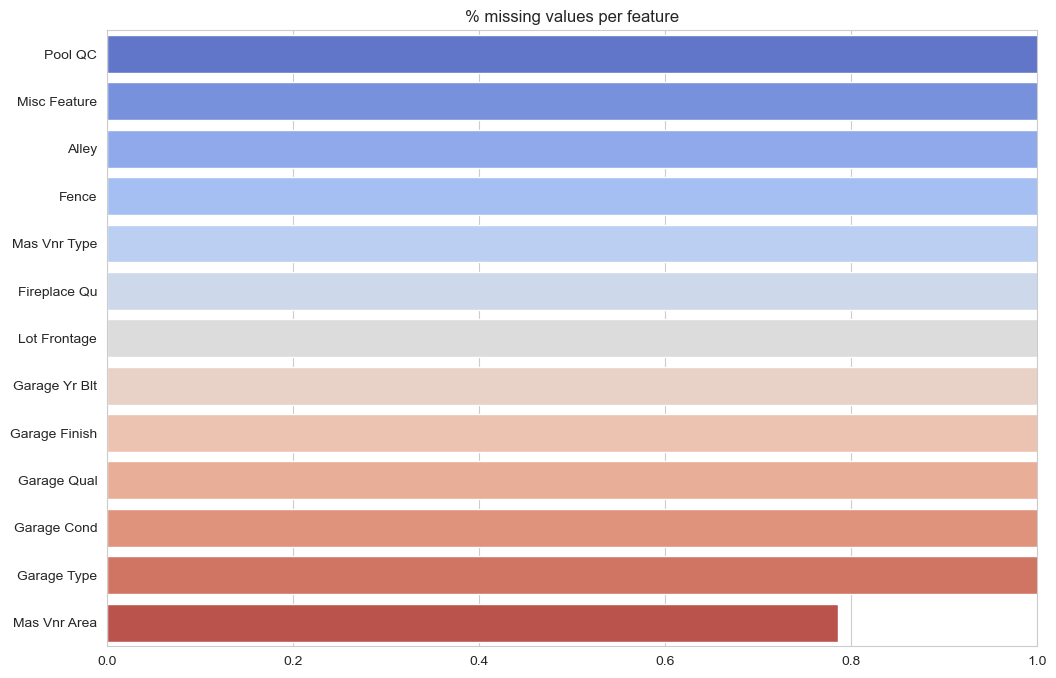

In [68]:
# to double-check plot again
# all 'basement' variables missing values have been filled with 0 or 'None'
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="coolwarm")
plt.title('% missing values per feature')
plt.ylabel("")
plt.xlim(0,1); # 0 to 1% missing values

In [69]:
# 'Mas Vnr Area' numerical variables
df[df['Mas Vnr Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [85]:
# 'Vnr Type' categorical variable
df[df['Mas Vnr Type'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [70]:
# to replace missing values to 'None' as its a string, categorical variable
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [71]:
# 'Area' is a numeric column, to replace missing values to 0
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [72]:
# to recalculate missing values again after replacing 0 and 'None'
percent_nan = percent_missing(df)

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\3586954316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="YlOrBr")


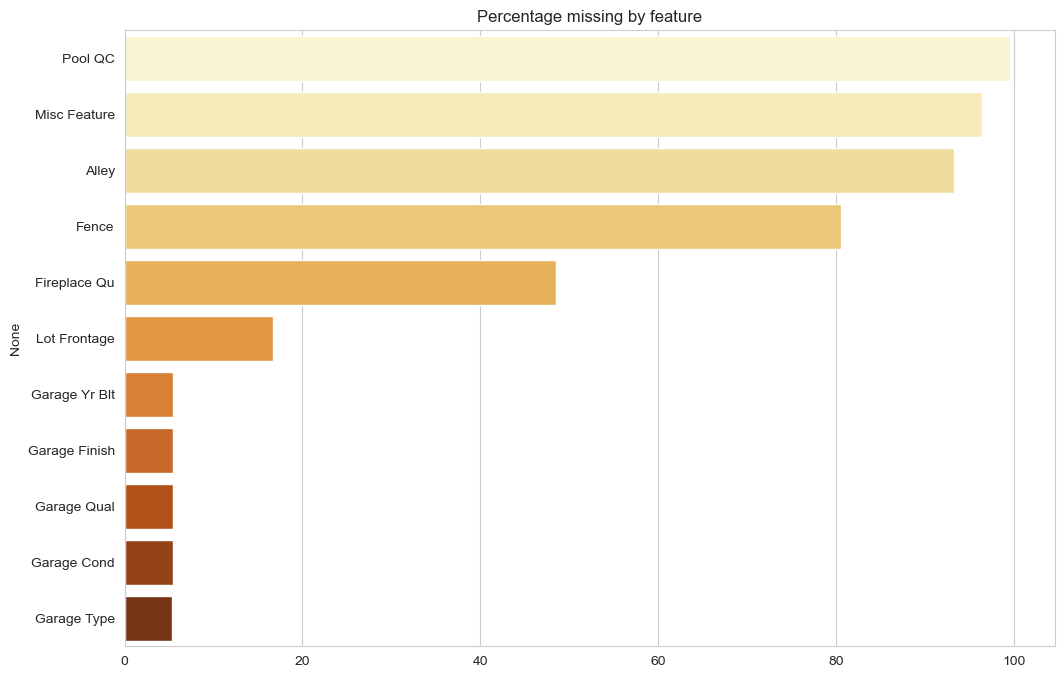

In [74]:
# remaining variables with > 5% missing values
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="YlOrBr")
plt.title("Percentage missing by feature");

In [77]:
# Garage variables with % NA values implies that the houses does not have a Garage build in at all
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [78]:
# therefore to fill numeric Garage columns with 0 and string columns with 'None'
# to define a new dataframe
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [79]:
# replacing missing values with 'None' in string columns
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [80]:
df['Garage Yr Blt']

0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2925    1984.0
2926    1983.0
2927       NaN
2928    1975.0
2929    1993.0
Name: Garage Yr Blt, Length: 2928, dtype: float64

In [81]:
#  to fill missing values in Garage year built with 0, numeric column, means that the houses does not have a Garage build in
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [82]:
# to recalculate missing values again after replacing 0 and 'None'
percent_nan = percent_missing(df)

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\2808068097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="Set2")


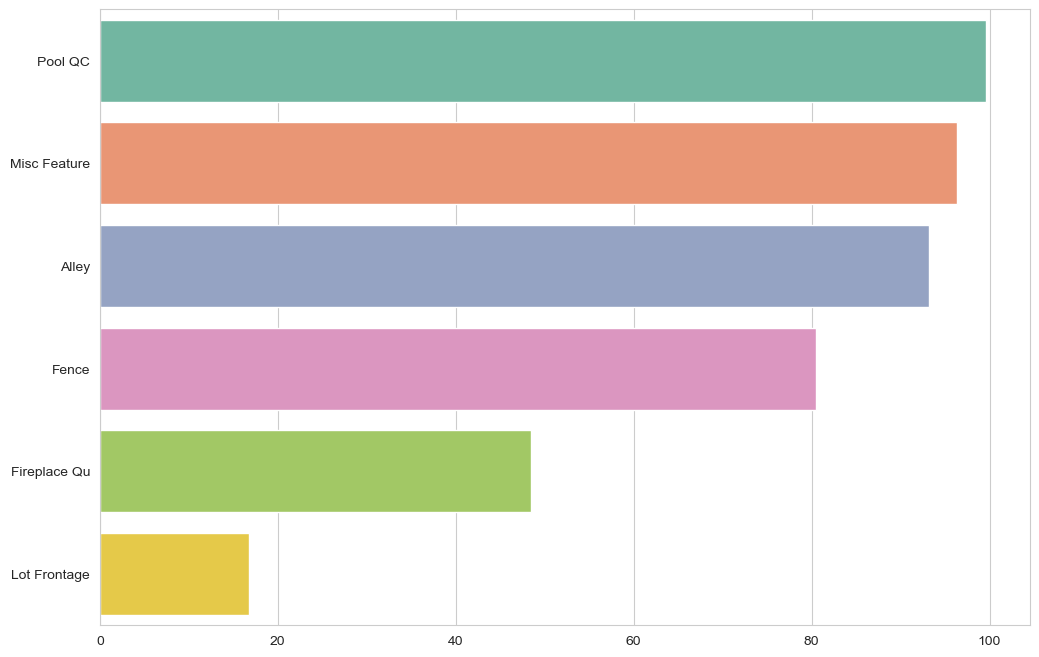

In [84]:
# remaining variables with > 17% missing values 
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="Set2")
plt.ylabel("");

In [85]:
# to print missing values variable columns
percent_nan.index

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage'],
      dtype='object')

In [86]:
# to see missing values type
df[['Lot Frontage','Fireplace Qu','Fence','Alley','Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [87]:
# 'Fence','Alley','Misc Feature','Pool QC' have 80% or more missing values in the dataset
# therefore it makes better sense not to include these variables for analysis, therefore drop them
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'], axis=1)

In [88]:
# to recalculate missing values again after replacing 0 and 'None'
percent_nan = percent_missing(df)

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\3806441160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="muted")


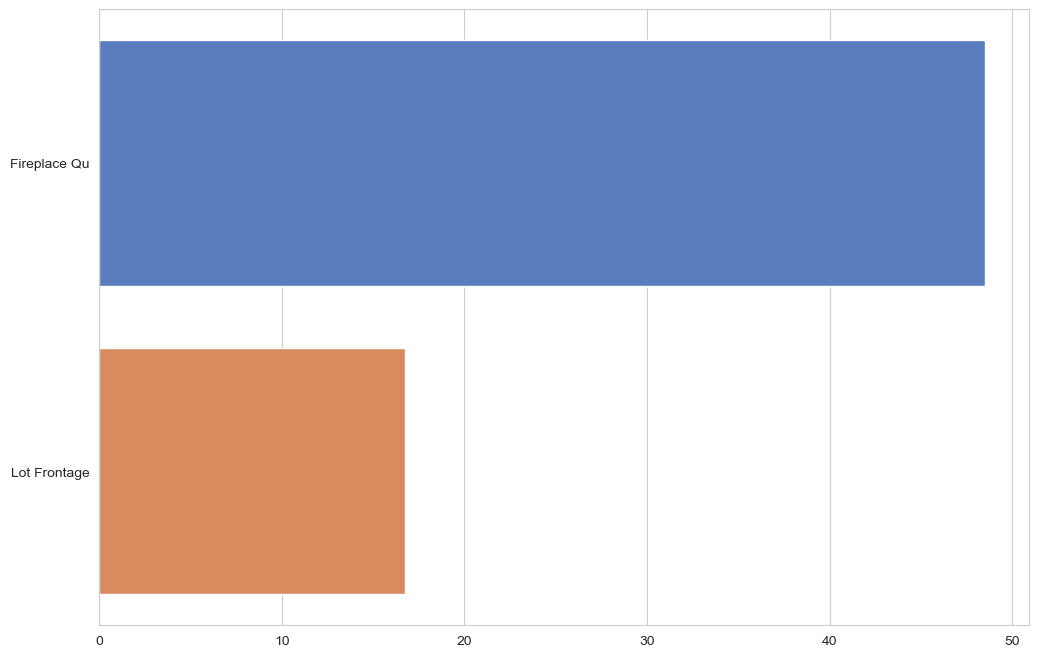

In [90]:
# remaining variables with > 17% missing values 
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values, palette="muted")
plt.ylabel("");

In [91]:
# 'Fireplace Qu' has 48% missing values
df[df['Fireplace Qu'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
6,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,191500
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,90,RL,55.0,12640,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,150900
2922,90,RL,63.0,9297,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Family,188000
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000


In [92]:
df['Fireplace Qu']

0        Gd
1       NaN
2       NaN
3        TA
4        TA
       ... 
2925    NaN
2926    NaN
2927    NaN
2928     TA
2929     TA
Name: Fireplace Qu, Length: 2928, dtype: object

In [93]:
# to replace missing vales in Fireplace Qu with 'None', cos string variable, there is no Fireplace built in the house
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [94]:
# to recalculate missing values again after replacing 0 and 'None'
percent_nan = percent_missing(df)

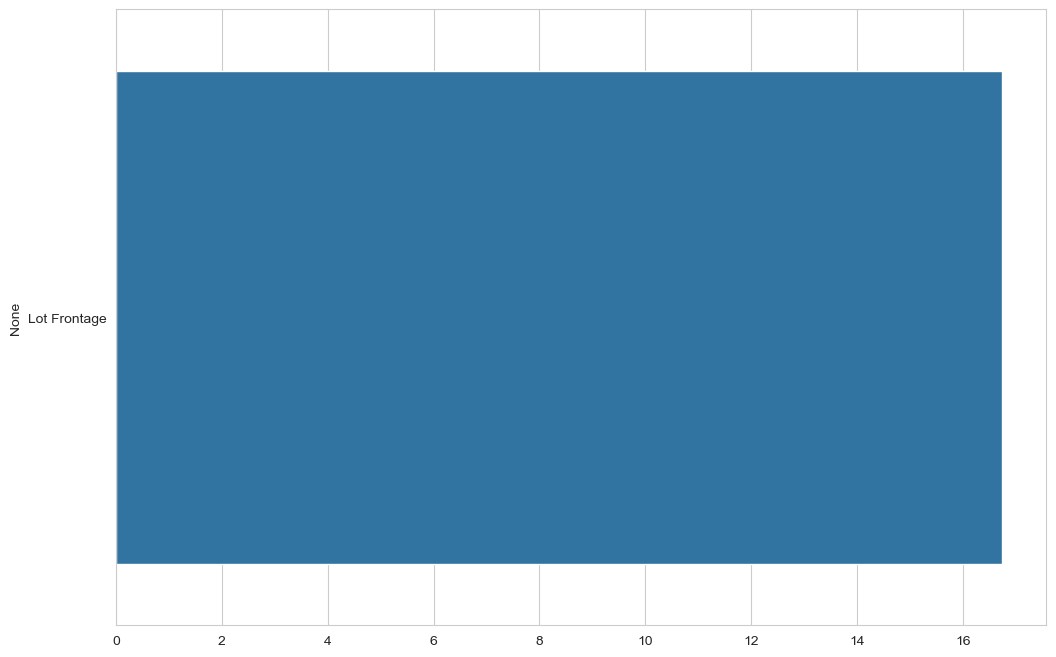

In [95]:
# remaining variables with > 17% missing values 
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(y=percent_nan.index, x=percent_nan.values);

In [97]:
# 'Lot Frontage' contains missing numerics
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2928, dtype: float64

In [98]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\2984746795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood', orient='h', palette="bright")


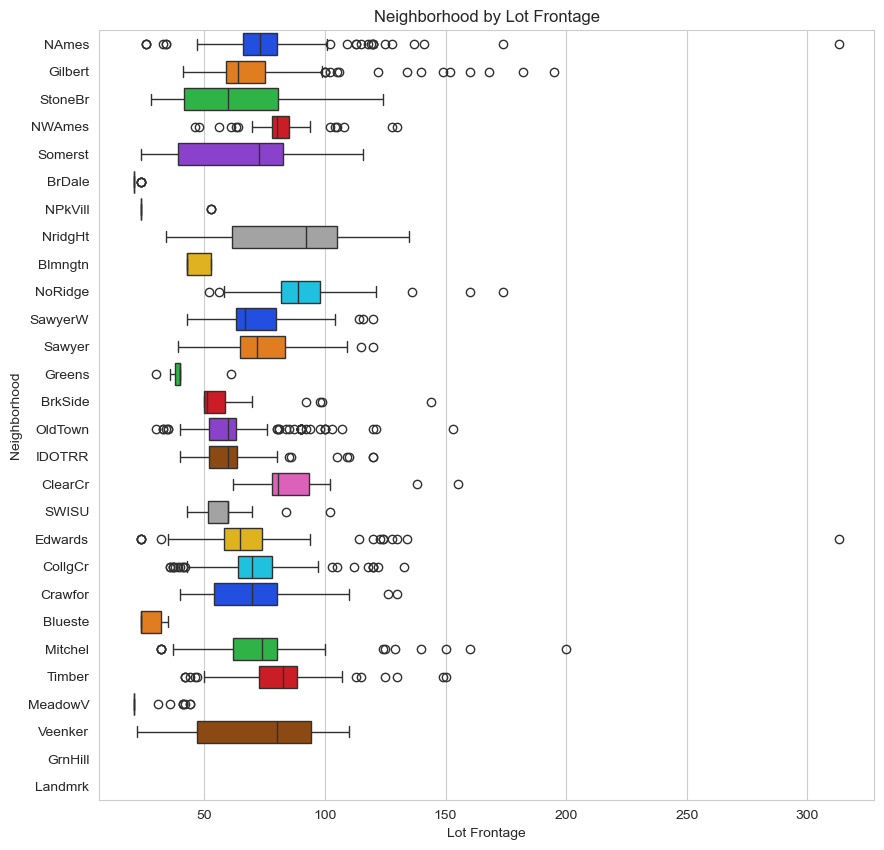

In [100]:
plt.figure(figsize=(10,10),dpi=100)
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood', orient='h', palette="bright")
plt.title('Neighborhood by Lot Frontage');

In [ ]:
# Imputation: to impute missing values in 'Lot Frontage' by the average of other neighborhood

In [101]:
df.groupby('Neighborhood')['Lot Frontage']

In [102]:
# to print the average of 'Lot Frontage' by neighborhood
# there are missing values in 'Lot Frontage': GrnHill and Landmrk
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [103]:
# to print rows where 'Lot Frontage' are missing
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2928, dtype: float64

In [104]:
# to replace missing values in 'Lot Frontage' with the average of 'Neighborhood' values
# pd.Dataframe.transform = to combine the groupby with an apply method
# val = values
# to transform missing values in 'Lot Frontage' with the average(mean) 'Neighborhood'
# lambda argument(s): expression
# val: val.fillna(val.mean())
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [105]:
# 'Lot Frontage' is still missing 3 values, because in the neighborhood 'GrnHill' and 'Landmrk', there are missing values
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [106]:
# to replace the rest of the missing values in 'Lot Frontage' with 0 as they do not have a lot frontage in the house at all
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [107]:
# to check for missing values in dataframe againe
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [108]:
# to recalculate missing values again after replacing with average of 'Neighborhood'
percent_nan = percent_missing(df)

In [109]:
# the series return 0 missing values in dataframe, no more missing values in dataset
percent_nan

Series([], dtype: float64)

In [110]:
## Predictive analysis
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [111]:
# to define X and y
X = df.drop('SalePrice', axis=1)

In [112]:
# to convert 'object' variables in X to dummies variables before analysis, drop first = True, to remove !st columm prevent multicollinearity
X = pd.get_dummies(X, drop_first=True)

In [113]:
y = df['SalePrice']

In [124]:
# check that variables have been coverted into dummy variables
X

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,20,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,True,False,False,False,True,False
2927,85,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,True,False,False,False,True,False


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
# testing set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
# scaler model
scaler = StandardScaler()

In [118]:
# to fit the scaler to the training data
scaled_X_train = scaler.fit_transform(X_train)

In [124]:
# to transform on the X test data
scaled_X_test = scaler.transform(X_test)

In [125]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [126]:
# random forest model
rf = RandomForestRegressor()

In [127]:
# to fit the Random Forest regressor to the training data
rf.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [128]:
# to do random forest prediction on the X test data
rf_pred = rf.predict(scaled_X_test)

In [129]:
# to print out first ten 'SalePrice' prediction
rf_pred[:10]

array([267666.7       , 328356.65      , 254898.62      , 194915.8       ,
       124220.98      , 156688.94      , 133694.        , 350687.7       ,
        94795.84      , 203657.85666667])

In [130]:
from sklearn.metrics import r2_score

In [132]:
# to define testing score
testing_score = []

In [133]:
a = r2_score(y_test,rf_pred)*100
testing_score.append(a)

print(f"r2_Score of {rf} model on Testing data is:",a) # Random Forest accuracy rate= 89%

r2_Score of RandomForestRegressor() model on Testing data is: 89.65406548062626


In [134]:
# to import XGBoost regressor
from xgboost import XGBRFRegressor

In [135]:
# to build the XGBoost regressor model
xg = XGBRFRegressor()

In [136]:
# to fit XG boost to the training data
xg.fit(scaled_X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [137]:
# xg prediction on the x test data
xg_pred = xg.predict(scaled_X_test)

In [138]:
xg_pred[:10]

array([264506.5  , 337565.22 , 261619.7  , 191210.52 , 135197.69 ,
       152064.84 , 127418.836, 401215.12 , 115557.5  , 208775.05 ],
      dtype=float32)

In [139]:
b = r2_score(y_test,xg_pred)*100
testing_score.append(b)

print(f"r2_Score of {xg} model on Testing data is:",b) # XGBoost regressor accuracy rate = 86.2%

r2_Score of XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...) model on Testing data is: 86.23676300048828


In [140]:
# to build the Adaboost model
ada = AdaBoostRegressor()

In [141]:
# to fit training data to X train data
ada.fit(scaled_X_train,y_train)

AdaBoostRegressor()

In [142]:
# to prediction on the X test data
ada_pred = ada.predict(scaled_X_test)

In [144]:
# to print first ten predictions on the AdaBoost model
ada_pred[:10]

array([249806.7003367 , 332313.875     , 275082.14805195, 214659.32614555,
       146875.27325581, 147797.45217391, 143893.72789116, 353522.13015873,
       145137.34754098, 216346.02307692])

In [145]:
# r2 score on the AdaBoost mode
c = r2_score(y_test,ada_pred)*100
testing_score.append(c)

print(f"r2_Score of {ada} model on Testing data is:",c) # AdaBoost regressor accuracy rate = 81.6%

r2_Score of AdaBoostRegressor() model on Testing data is: 81.58812339944183


In [146]:
# to build the Gradient Boost regressor model
gb = GradientBoostingRegressor()

In [147]:
# to fit the gradient Boost regressor model onto the training data
gb.fit(scaled_X_train,y_train)

GradientBoostingRegressor()

In [148]:
# to predict on the x test data
gb_pred = gb.predict(scaled_X_test)

In [149]:
# to print the first 10 predictions of the Gradient Boost regressor
gb_pred[:10]

array([250069.29227548, 349920.83522966, 268877.64753775, 192073.29323046,
       115219.59079541, 146980.21416322, 126848.69850257, 354843.1612166 ,
        99896.01664728, 216059.62529283])

In [150]:
# r2 score Gradient Boost regressor model
d = r2_score(y_test,gb_pred)*100
testing_score.append(d)

print(f"r2_Score of {gb} model on Testing data is:",d) # Gradient Boost regressor accuracy rate = 91.5%

r2_Score of GradientBoostingRegressor() model on Testing data is: 91.46784308078017


In [151]:
# to import Decision Tree regressor model
from sklearn.tree import DecisionTreeRegressor

In [152]:
# to build the decision tree regressor model
dt = DecisionTreeRegressor()

In [159]:
# to fit X training data to Decision tree regressor

In [153]:
dt.fit(scaled_X_train,y_train)

DecisionTreeRegressor()

In [154]:
# prediction on the decision tree regressor model
dt_pred = dt.predict(scaled_X_test)

In [155]:
# to print first 10 predictions of the decision tree regressor model
dt_pred[:10]

array([271000., 337500., 228500., 189500., 115000., 195000., 145000.,
       337500.,  89000., 210000.])

In [156]:
# to find the r2 score of the decision tree regressor model
e = r2_score(y_test,dt_pred )*100
testing_score.append(e)

print(f"r2_Score of {dt} model on Testing data is:",e) # Accuracy rate of the Decision tree model = 79.4%

r2_Score of DecisionTreeRegressor() model on Testing data is: 79.35054073958466


In [158]:
# the Gradient Boost Regressor model has the highest accuracy rate at 91.5%
# to print the Feature Importance of the Gradient Boost regessor model
gb_importances = gb.feature_importances_

In [159]:
X.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=260)

In [160]:
# 'Importance' must be in []       
pd.DataFrame(index=X.columns, data = gb_importances, columns=['Importance'])

,Importance
MS SubClass,0.000232
Lot Frontage,0.002165
Lot Area,0.015394
Overall Qual,0.538046
Overall Cond,0.006883
...,...
Sale Condition_AdjLand,0.000000
Sale Condition_Alloca,0.000000
Sale Condition_Family,0.000000
Sale Condition_Normal,0.000380


In [161]:
# to read into a new dataframe
gb_feat_imp = pd.DataFrame(index=X.columns, data = gb_importances, columns=['Importance'])

In [162]:
# to sort variable importance, Ascending from most important to least important
gb_feat_imp = gb_feat_imp.sort_values('Importance', ascending=False)

In [163]:
# to remove out variables of less than 0.001 importance
gb_feat_imp[gb_feat_imp['Importance'] > 0.001]

,Importance
Overall Qual,0.538046
Gr Liv Area,0.130309
Total Bsmt SF,0.058896
Garage Cars,0.055055
Year Built,0.036566
BsmtFin SF 1,0.029187
1st Flr SF,0.027937
2nd Flr SF,0.021565
Lot Area,0.015394
Year Remod/Add,0.012128


In [164]:
# to read into a new dataframe
gb_imp = gb_feat_imp[gb_feat_imp['Importance'] > 0.001]

C:\Users\miche\AppData\Local\Temp\ipykernel_5712\3687119849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb_imp, x='Importance', y=gb_imp.index, palette="deep")


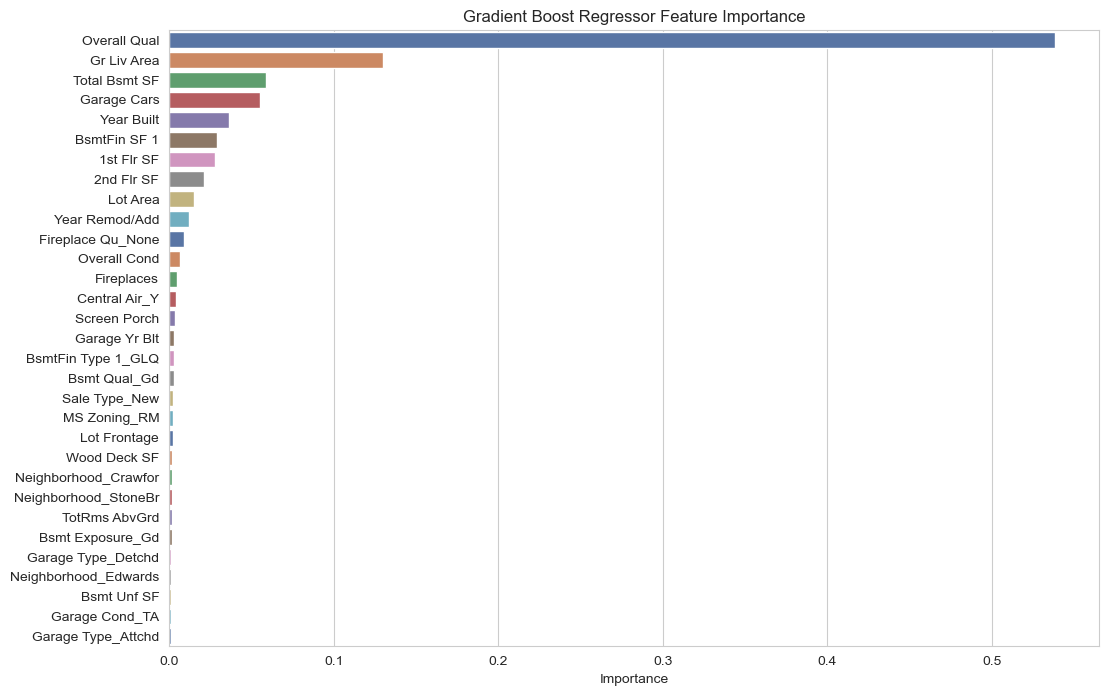

In [166]:
# to plot a barplot to visualise the feature importance
# Top 3 predictors of Housing price = 'Overall Qua','Gr Liv Area','Garage Cars'
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=gb_imp, x='Importance', y=gb_imp.index, palette="deep")
plt.title('Gradient Boost Regressor Feature Importance')
plt.ylabel("");